## Graph Neural Network Property Predictor


## Imports

In [1]:
# Working on segmenting from monolithic structure as this file is getting too lengthy
from model import GNN
from utils.config import FEATURE_NAMES, GRAPH_METRICS
from utils.visualization import VisualizationManager
import utils.data_utils as DataUtils

c:\Users\Will\miniforge3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Execution


Data Processing Debug:
Number of nodes: 100
Number of features: 55
Feature tensor shape: torch.Size([100, 55])
Edge index shape: torch.Size([2, 271])
Target value: 0.010416666977107525
Selected nodes: [np.int64(70), 28, 29, 42]

Data Processing Debug:
Number of nodes: 100
Number of features: 55
Feature tensor shape: torch.Size([100, 55])
Edge index shape: torch.Size([2, 257])
Target value: 0.02083333395421505
Selected nodes: [np.int64(23), 8, 35, 62]
Epoch   0: Train Loss = 1.9063, Test Loss = 0.0663
Epoch   5: Train Loss = 1.7474, Test Loss = 0.1098
Epoch  10: Train Loss = 1.1963, Test Loss = 0.1821
Epoch  15: Train Loss = 1.2908, Test Loss = 0.2085
Epoch  20: Train Loss = 1.0580, Test Loss = 0.1984
Epoch  25: Train Loss = 0.4553, Test Loss = 0.1744
Epoch  30: Train Loss = 0.4735, Test Loss = 0.1636
Epoch  35: Train Loss = 0.3465, Test Loss = 0.1740
Epoch  40: Train Loss = 0.2932, Test Loss = 0.1588
Epoch  45: Train Loss = 0.4325, Test Loss = 0.1539
Epoch  50: Train Loss = 0.1432, Te

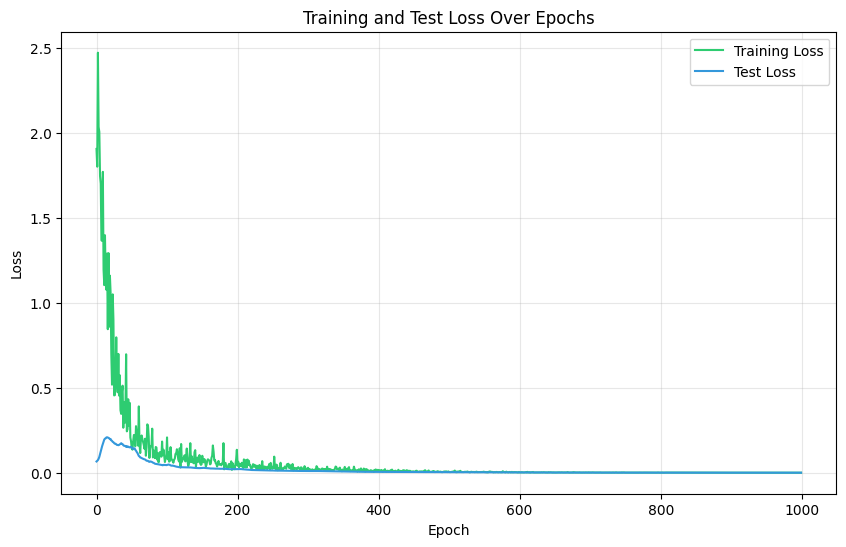


Final Test Metrics:
test_loss: 0.0002
mae: 0.0107
r2_score: -inf


In [4]:
# Generate different graphs for training and test to test generalization
G_train, selected_nodes_train = DataUtils.generate_graph(num_nodes=100, edge_prob=0.05)
G_test, selected_nodes_test = DataUtils.generate_graph(num_nodes=100, edge_prob=0.05)

# Select target feature for analysis.
valid_features = [f"GMinus_{metric}" for metric in GRAPH_METRICS]
target_feature = "GMinus_ConnectedComponents"

# Make sure the user only selects a feature in P(G/G')
if target_feature not in valid_features:
    raise ValueError(
        f"Invalid target feature: {target_feature}\n"
        f"Target feature must be one of the following G or G/G' metrics:\n"
        f"{', '.join(valid_features)}"
    )

target_idx = FEATURE_NAMES.index(target_feature)

train_data = DataUtils.process_graph_data(G_train, selected_nodes_train, target_idx)
test_data = DataUtils.process_graph_data(G_test, selected_nodes_test, target_idx)

model = GNN(node_feature_dim=len(FEATURE_NAMES)-1)

losses, trained_model = model.train_model(
    model, 
    train_data=train_data,
    test_data=test_data, 
    target_idx=target_idx
)

# Plot training progress
vis = VisualizationManager()
vis.plot_training_progress(
    train_losses=[loss['train_loss'] for loss in losses],
    test_losses=[loss['test_loss'] for loss in losses],
    title="Training and Test Loss Over Epochs"
)

# Get final test metrics
test_metrics = trained_model.evaluate(test_data, target_idx)
print("\nFinal Test Metrics:")
for metric, value in test_metrics.items():
    print(f"{metric}: {value:.4f}")